In [1]:
import math
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats
from matplotlib import pyplot as plt
from scipy.optimize import minimize
from scipy.special import betaln, gammaln
from scipy.stats import binom
import time
from BetabinGLM import BetaBinomial

# Randomly select gene names

In [2]:
gene_name = pd.read_csv('gene_name_random.csv', index_col = 0)
gene_name

,gene_name,isoform1_name,isoform2_name,gene_num
0,ZRANB2,P.r1.ZRANB2,P.r2.ZRANB2,2
1,ZNF839,P.r1.ZNF839,P.r2.ZNF839,5
2,ZNF80,P.r1.ZNF80,P.r2.ZNF80,6
3,ZNF692,P.r1.ZNF692,P.r2.ZNF692,10
4,ZNF609,P.r1.ZNF609,P.r2.ZNF609,14
...,...,...,...,...
495,AC012368.1,P.r1.AC012368.1,P.r2.AC012368.1,2514
496,AC012236.1,P.r1.AC012236.1,P.r2.AC012236.1,2515
497,AC004540.1,P.r1.AC004540.1,P.r2.AC004540.1,2529
498,ABL1,P.r1.ABL1,P.r2.ABL1,2534


In [3]:
genes = gene_name.to_numpy()
genes

array([['ZRANB2', 'P.r1.ZRANB2', 'P.r2.ZRANB2', 2],
       ['ZNF839', 'P.r1.ZNF839', 'P.r2.ZNF839', 5],
       ['ZNF80', 'P.r1.ZNF80', 'P.r2.ZNF80', 6],
       ...,
       ['AC004540.1', 'P.r1.AC004540.1', 'P.r2.AC004540.1', 2529],
       ['ABL1', 'P.r1.ABL1', 'P.r2.ABL1', 2534],
       ['AAAS', 'P.r1.AAAS', 'P.r2.AAAS', 2547]], dtype=object)

# Load dataset

In [4]:
df_clf = pd.read_csv('isoform_count_toaod.csv')
df_clf

,index,disease,P:r1@ZSWIM4,P:r1@ZSCAN31,P:r1@ZSCAN2,P:r1@ZRANB2,P:r1@ZP3,P:r1@ZNF846,P:r1@ZNF839,P:r1@ZNF80,...,P:r3@ABHD14B,P:r2@ABHD12,P:r2@ABCG2,P:r2@ABCG1,P:r2@ABCB9,P:r2@ABCB10,P:r2@ABCA6,P:r2@ABCA5,P:r2@ABCA2,P:r2@AAAS
0,AAACCTGAGAGTAATC-2,NPC,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AAACCTGAGTGAACAT-2,NPC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,AAACCTGAGTGTGAAT-2,NPC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,AAACCTGGTAACGCGA-2,NPC,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,AAACCTGGTACGCACC-2,NPC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48300,TTTGTCAGTCTAAAGA-13,NLH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48301,TTTGTCAGTCTGATCA-13,NLH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48302,TTTGTCATCACATACG-13,NLH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48303,TTTGTCATCCGTAGTA-13,NLH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Test: using gene ZBTB18

In [5]:
#disease -> exog
trans = lambda x: 0 if x=='NLH' else 1
tran = df_clf['disease']
exog = []
for i in range (len(tran)):
    exog.append(trans(tran[i]))
exog = np.array(exog, dtype = float)
exog

array([1., 1., 1., ..., 0., 0., 0.])

In [6]:
#promoters -> endog
endog1 = df_clf['P:r1@ZBTB18'].to_numpy()
endog2 = df_clf['P:r2@ZBTB18'].to_numpy()
endog = np.array([endog1, endog2]).T

In [7]:
mod = BetaBinomial(endog, exog)
phi = mod.phi
W = mod.W
#print(W, phi)

/home/liujinhui/.local/lib/python3.8/site-packages/BetabinGLM/BetaBinomial.py:35: RuntimeWarning: invalid value encountered in subtract
  cost = np.sum(betaln(k + a, n - k + b) - betaln(a, b))


# BetaBinomial

In [8]:
# make exactly matched gene names
def change(x):
    if('.' in x):
        x = x.replace('.', ':', 1)
    if('.' in x):
        x = x.replace('.', '@', 1)
    return x

In [9]:
#save part of the results
def save_results(result):
    coef = []
    intercept = []
    genename = []
    phi = []
    NLL = []
    for gene in result:
        genename.append(gene)
        coef.append(result[gene]['coef'])
        intercept.append(result[gene]['intercept'])
        phi.append(result[gene]['phi'])
        NLL.append(result[gene]['NLL'])
    a1 = {'gene name': genename, 'Python_coef': coef, 'Python_intercept': intercept, 'Python_phi': phi, 'NLL': NLL}
    ress = pd.DataFrame(a1)
    ress.to_csv('betabin_result_test_Nelder-Mead(updated_method,1e-7,testing).csv') 

In [10]:
result = dict()
cnt = 0
for i in range (0,len(genes)):
    #genes[i][0] gives the gene name, genes[i][1] and genes[i][2] are two related isoforms
    gene = genes[i][0]
    isoform1 = change(genes[i][1])
    isoform2 = change(genes[i][2])
    if(isoform1 not in df_clf.columns):
        isoform1 = isoform1.replace('.','-', 1) 
    if(isoform2 not in df_clf.columns):
        isoform2 = isoform2.replace('.','-', 1) 
    if((isoform1 in df_clf.columns) and (isoform2 in df_clf.columns)): cnt+=1
    print('Current gene No.:',cnt,'/ 500', end = '\r')# show progress
    endog1 = df_clf[isoform1].to_numpy()
    endog2 = df_clf[isoform2].to_numpy()
    endog = np.array([endog1, endog2]).T
    mod = BetaBinomial(endog, exog)
    result[gene] = {'coef': mod.W[0], 'intercept': mod.W[1], 'phi':mod.phi, 'NLL': -mod.LL}
    if(i%5 == 0):
        save_results(result)

/home/liujinhui/.local/lib/python3.8/site-packages/BetabinGLM/BetaBinomial.py:33: RuntimeWarning: divide by zero encountered in true_divide
  a = Z * (1/phi - 1)
/home/liujinhui/.local/lib/python3.8/site-packages/BetabinGLM/BetaBinomial.py:34: RuntimeWarning: divide by zero encountered in true_divide
  b = (1 - Z) * (1/phi - 1)


In [11]:
save_results(result)

## Compare with the result gotten from the aod R package

In [12]:
df_aod = pd.read_csv('betabin_aod_result_full(withNLL).csv', index_col = 0)
aod_result = df_aod.to_numpy()
aod_result

array([['ZSWIM4', -0.267120679871514, 1.15238527849454,
        0.999999376168363, 42.75160807189097],
       ['ZSCAN2', 0.261421489143553, 4.3343184032325, 0.592425366270737,
        61.03734237545832],
       ['ZRANB2', 0.0477660169891122, 4.21806831188653,
        0.165771703158815, 930.8549072464548],
       ...,
       ['ABCA5', -0.366214756410142, 3.37444474071072, 0.999999731490264,
        244.4053065884441],
       ['ABCA2', -0.373000834031107, 0.587971796154856,
        0.999999806367082, 74.99256411486306],
       ['AAAS', -0.92833129377292, 6.26457873715969, 0.999994977547945,
        97.86752547042728]], dtype=object)

In [13]:
aod_coef = []
aod_intercept = []
aod_phi = []
aod_NLL = []

for i in range (len(genes)):
    idx = genes[i][3]
    aod_coef.append(aod_result[idx][1])
    aod_intercept.append(aod_result[idx][2])
    aod_phi.append(aod_result[idx][3])
    aod_NLL.append(aod_result[idx][4])

In [14]:
df_Python = pd.read_csv('betabin_result_test_Nelder-Mead(updated_method,1e-7,testing).csv', index_col = 0)
Python_result = df_Python.to_numpy()

In [15]:
Python_coef = []
Python_intercept = []
Python_phi = []
Python_NLL = []

for i in range (len(genes)):
    Python_coef.append(Python_result[i][1])
    Python_intercept.append(Python_result[i][2])
    Python_phi.append(Python_result[i][3])
    Python_NLL.append(Python_result[i][4])
Python_coef

[0.0482733198946734,
 0.9394606357653826,
 1.15656278295259,
 -0.6239970388893121,
 -0.4962223143773661,
 -0.4300201870315877,
 -0.2114726507229898,
 0.4231380018385788,
 -0.861854114318011,
 -0.3008156269322174,
 0.0997975916929495,
 -0.1023971764438544,
 0.2996587003644934,
 0.7600351092970377,
 0.6066517004726242,
 0.3288036178395149,
 0.4418194999849082,
 0.1698880932374526,
 -0.0477445095374393,
 0.5731795027476982,
 0.7686238716998859,
 0.0312114451761107,
 -1.8323920095742896,
 0.0558114961123214,
 0.1850295066163735,
 0.0668859975674637,
 -0.4163702877094662,
 -1.333404674457366,
 -0.5341465521835218,
 0.1033226872061208,
 -0.1922099016758937,
 0.0693027180383914,
 0.4714486243859681,
 -0.3080738066804007,
 1.460370070655398,
 0.0269251065482232,
 -0.9984294105416368,
 0.4798690204718232,
 -0.6135233587259799,
 -0.0609010496584412,
 0.2566764907887102,
 0.387124851332834,
 0.0990054528124757,
 -1.0970345829897412,
 1.0136727277223658,
 -0.1100392627238143,
 -1.5739117335132369,

In [16]:
coef_diff = [(abs(Python_coef[i] - aod_coef[i])) for i in range (len(Python_coef))]
intercept_diff = abs(np.array(Python_intercept) - aod_intercept)
phi_diff = abs(np.array(Python_phi) - aod_phi)
NLL_diff = np.array(Python_NLL) - aod_NLL
NLL_diff

array([-1.00056210e-05, -6.69542235e-03, -3.42192806e-07,  2.99451494e-06,
       -3.73865478e-05, -1.73891061e-06, -2.85793647e-07, -7.99652852e-07,
       -1.45793166e-06, -7.59486340e-07, -2.23310089e-05, -1.84825774e-06,
       -3.21862699e-05, -1.01390580e-06, -5.56469516e-07, -9.67844881e-06,
       -6.44418863e-04, -1.32155765e-06, -1.82387673e-04, -1.07212252e-05,
       -1.19194141e-06,  1.36569535e-04, -2.54733422e-07, -8.45253112e-07,
       -4.11354364e-07, -1.95356623e-06, -5.58659124e-07, -1.71414140e-06,
       -8.48060608e-06, -5.13304317e-05, -2.66034164e-07, -7.54102842e-07,
       -1.75673418e-05, -3.71941712e-06,             nan, -1.84593154e-06,
       -3.69048723e-06, -1.26197949e-06, -7.84850954e-07, -8.53451070e-07,
       -9.24293658e-07, -6.89625374e-07, -2.73677855e-07, -3.47763023e-06,
       -6.96004815e-06, -1.86124375e-06, -2.76238318e-03, -3.58890361e-06,
       -2.52511363e-03, -2.53546852e-06, -3.99605327e-08, -7.81015160e-06,
       -4.27940283e-03, -

In [17]:
#compare coefficients
cnt_0 = 0
cnt_1 = 0
cnt_2 = 0
for i in coef_diff:
    if i >= 1:
        cnt_0 += 1 
    if i >= 0.1:
        cnt_1 += 1
    if i >= 0.01:
        cnt_2 += 1
print(f'Number of coefficients with difference > 1: {cnt_0}')
print(f'Number of coefficients with difference > 0.1: {cnt_1}')
print(f'Number of coefficients with difference > 0.01: {cnt_2}')
print()

#compare intercepts
cnt_0 = 0
cnt_1 = 0
cnt_2 = 0
for i in intercept_diff:
    if i >= 1:
        cnt_0 += 1 
    if i >= 0.1:
        cnt_1 += 1
    if i >= 0.01:
        cnt_2 += 1
print(f'Number of intercepts with difference > 1: {cnt_0}')
print(f'Number of intercepts with difference > 0.1: {cnt_1}')
print(f'Number of intercepts with difference > 0.01: {cnt_2}')
print()

#compare phi
cnt_0 = 0
cnt_1 = 0
cnt_2 = 0
for i in phi_diff:
    if i >= 0.1:
        cnt_0 += 1 
    if i >= 0.01:
        cnt_1 += 1
    if i >= 0.001:
        cnt_2 += 1
print(f'Number of phi with difference > 0.1: {cnt_0}')
print(f'Number of phi with difference > 0.01: {cnt_1}')
print(f'Number of phi with difference > 0.001: {cnt_2}')
print()

#compare NLL
cnt = 0
for i in NLL_diff:
    if i > 0:
        cnt += 1
print(f'Number of genes with NLL > the one from aod package: {cnt}')
print(f'Largest NLL difference: {max(NLL_diff)}')

Number of coefficients with difference > 1: 0
Number of coefficients with difference > 0.1: 6
Number of coefficients with difference > 0.01: 45

Number of intercepts with difference > 1: 0
Number of intercepts with difference > 0.1: 5
Number of intercepts with difference > 0.01: 42

Number of phi with difference > 0.1: 3
Number of phi with difference > 0.01: 4
Number of phi with difference > 0.001: 7

Number of genes with NLL > the one from aod package: 36
Largest NLL difference: 0.049729631617083214


In [18]:
a1 = {'gene_name': genes[:, 0], 'Python_coef': Python_coef, 'aod_coef': aod_coef, 'coef_diff': coef_diff, 'Python_intercept': Python_intercept, 'aod_intercept': aod_intercept, 'intercept_diff': intercept_diff, 'Python_phi': Python_phi, 'aod_phi': aod_phi, 'phi_diff': phi_diff, 'Python_NLL': Python_NLL, 'aod_NLL': aod_NLL, 'NLL_diff': NLL_diff}
comp = pd.DataFrame(a1)
comp

,gene_name,Python_coef,aod_coef,coef_diff,Python_intercept,aod_intercept,intercept_diff,Python_phi,aod_phi,phi_diff,Python_NLL,aod_NLL,NLL_diff
0,ZRANB2,0.048273,0.047766,0.000507,4.217563,4.218068,0.000505,0.165745,0.165772,2.646390e-05,930.854897,930.854907,-1.000562e-05
1,ZNF839,0.939461,0.922660,0.016800,1.819175,1.801484,0.017690,1.000000,1.000000,3.546122e-08,68.860963,68.867658,-6.695422e-03
2,ZNF80,1.156563,1.156793,0.000230,2.647837,2.647908,0.000071,0.657420,0.657628,2.085789e-04,50.943427,50.943427,-3.421928e-07
3,ZNF692,-0.623997,-0.624227,0.000230,5.638324,5.638361,0.000037,0.000156,0.000008,1.483503e-04,73.386065,73.386062,2.994515e-06
4,ZNF609,-0.496222,-0.491733,0.004490,2.463874,2.461595,0.002279,1.000000,1.000000,3.261894e-08,53.469442,53.469479,-3.738655e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,AC012368.1,-0.867548,-0.867264,0.000284,1.432348,1.432269,0.000078,0.686953,0.687243,2.895849e-04,865.148193,865.148209,-1.524587e-05
496,AC012236.1,-0.209304,-0.208891,0.000413,1.611444,1.610992,0.000452,0.270163,0.270219,5.569303e-05,1096.834514,1096.834524,-1.047485e-05
497,AC004540.1,0.497533,0.497963,0.000430,2.251333,2.251070,0.000264,1.000000,0.999999,8.096921e-07,43.450357,43.450358,-7.352374e-07
498,ABL1,0.111892,0.111720,0.000173,3.712764,3.712926,0.000162,0.435758,0.436008,2.497273e-04,110.813289,110.813290,-4.277605e-07


In [19]:
comp.to_csv('comparison.csv')

## Show NLL comparison

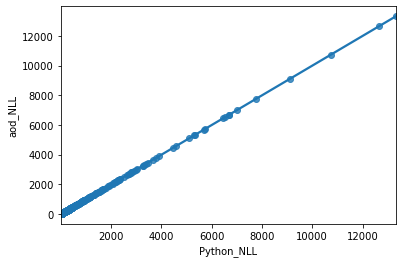

In [22]:
import seaborn as sns

sns.regplot(x = "Python_NLL", y = "aod_NLL", data = comp)
plt.show()